In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os

In [2]:
## Defining batch specfications
batch_size = 64
img_height = 250
img_width = 250

In [3]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/home/zehra/Desktop/Animated_accident_data',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

Found 338 files belonging to 2 classes.


In [5]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
retVal = MyCnn.fit(training_ds, validation_data= training_ds, epochs = 100)

Epoch 1/100
6/6 [==============================] - 16s 2s/step - loss: 7.3798 - accuracy: 0.5178 - val_loss: 3.8895 - val_accuracy: 0.4527
Epoch 2/100
6/6 [==============================] - 13s 2s/step - loss: 0.7746 - accuracy: 0.5266 - val_loss: 0.7575 - val_accuracy: 0.5237
Epoch 3/100
6/6 [==============================] - 14s 2s/step - loss: 0.6953 - accuracy: 0.5178 - val_loss: 0.6387 - val_accuracy: 0.6893
Epoch 4/100
6/6 [==============================] - 15s 2s/step - loss: 0.6277 - accuracy: 0.6598 - val_loss: 0.6037 - val_accuracy: 0.6213
Epoch 5/100
6/6 [==============================] - 14s 2s/step - loss: 0.5822 - accuracy: 0.6331 - val_loss: 0.6858 - val_accuracy: 0.6124
Epoch 6/100
6/6 [==============================] - 14s 2s/step - loss: 0.5444 - accuracy: 0.7249 - val_loss: 0.4826 - val_accuracy: 0.7130
Epoch 7/100
6/6 [==============================] - 15s 2s/step - loss: 0.4578 - accuracy: 0.7840 - val_loss: 0.6780 - val_accuracy: 0.6775
Epoch 8/100
6/6 [==========

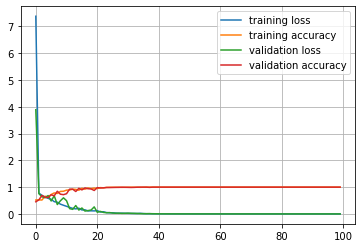

In [8]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

## stats on validation data
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()


In [13]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/home/zehra/Desktop/Animated_accident_data',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=338

)

Found 338 files belonging to 2 classes.


In [14]:
 AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
      

<Figure size 2160x2160 with 0 Axes>

In [15]:
 for mem in predictions:
        deneme=predlabel.append(class_names[np.argmax(mem)])
        print(class_names[np.argmax(mem)])
        deneme=prdlbl.append(np.argmax(mem))

no_accident
no_accident
no_accident
no_accident
accident
no_accident
no_accident
no_accident
no_accident
no_accident
accident
no_accident
no_accident
no_accident
no_accident
no_accident
no_accident
no_accident
accident
no_accident
no_accident
no_accident
no_accident
no_accident
accident
no_accident
accident
no_accident
accident
no_accident
no_accident
no_accident
no_accident
accident
no_accident
accident
accident
no_accident
no_accident
accident
no_accident
no_accident
accident
accident
no_accident
no_accident
no_accident
accident
no_accident
accident
no_accident
accident
no_accident
accident
no_accident
accident
accident
no_accident
accident
accident
no_accident
accident
no_accident
accident
no_accident
no_accident
no_accident
no_accident
accident
accident
accident
accident
no_accident
no_accident
no_accident
accident
no_accident
accident
no_accident
accident
accident
accident
accident
no_accident
accident
no_accident
no_accident
accident
accident
accident
accident
no_accident
no_acci

In [16]:
   
    AccuracyVector = np.array(prdlbl) == labels
    print("AccuracyVector: ", AccuracyVector)
    print("Type: ", type(AccuracyVector))
    print("prdlbl: ", prdlbl)
    print("labels: ", labels)

AccuracyVector:  tf.Tensor(
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  Tru

In [24]:
sayac=0
for values in AccuracyVector:
    if(values==True):
        sayac=sayac+1
testAccuarcy=sayac/338
print("Test Accuarcy: ", testAccuarcy)

Test Accuarcy:  1.0


In [26]:
MyCnn.save('/home/zehra/Desktop/Animated_accident_data/Model17.h5')  